## 계산 그래프

### 클래스 선언

In [182]:
# 덧셈 그래프
class add_graph:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = 1 * dout
        dy = 1 * dout
        return dx, dy

In [183]:
# 곱셈 그래프
class mul_graph:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
        
    def backward(self, dout):
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

#### mse 미분
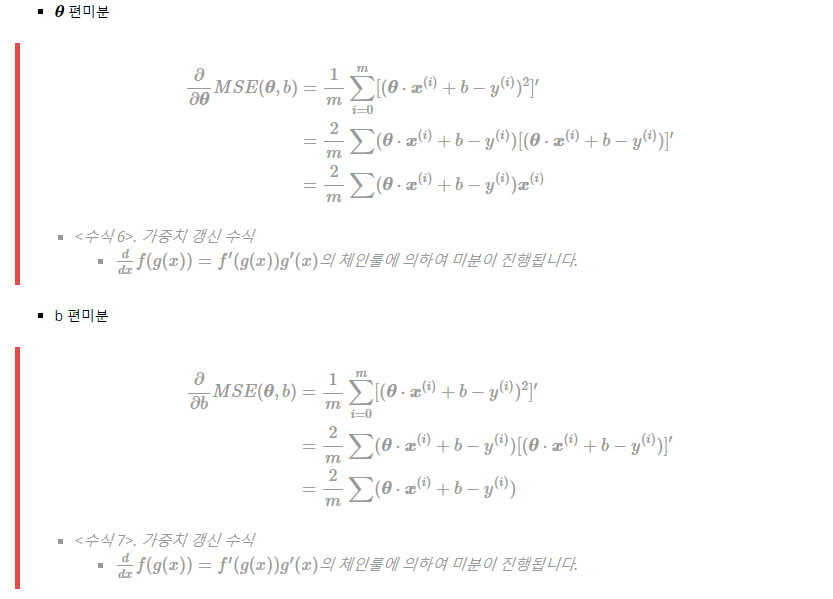

In [184]:
# mse 그래프
class mse_graph:
    def __init__(self):
        self.loss = None
        self.x = None # feature 값
        self.y = None # 결과값
        self.t = None # target 값(정답)
        
    def forward(self, y, t):
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0]
        return self.loss
    
    def backward(self, x, dout=1):
        data_size = self.t.shape[0]
        dweight_mse = (((self.y - self.t) * x).sum() * 2) / data_size
        dbias_mse = ((self.y - self.t).sum() * 2) / data_size
        return dweight_mse, dbias_mse

### 사과, 오랜지 가격 구하기

In [185]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [186]:
# 필요한 연산자 객체 생성
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [187]:
# 생성한 객체를 사용해 연산
apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)
print(total_price)

715.0000000000001


In [188]:
# 역방향으로 계산하므로(역전파) backward
dprice = 1
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)

# 각 값이 1 증가할 때마다 total_price의 증가량
print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dorange_num)

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


### 온도 변환에 적용

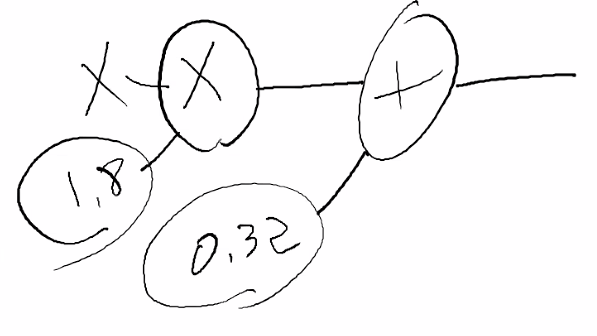

In [189]:
import numpy as np

In [206]:
def celcius_to_fahrenheit(x):
    return x * 1.8 + 32

In [191]:
weight_graph = mul_graph() # 위 그림에서 1.8
bias_graph = add_graph() # 위 그림에서 0.32

In [192]:
# weight와 bias 초기 값 설정
weight = np.random.uniform(0, 5, 1) # 0에서 5 사이의 값을 동일한 확률로 추출
print(weight)
bias = 0

[0.25153478]


In [193]:
# 데이터 로드
data_C = np.array(range(0, 100))
data_F = celcius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [194]:
# forward 계산
weighted_data = weight_graph.forward(weight, scaled_data_C)
predict_data = bias_graph.forward(weighted_data, bias)
print(predict_data)

[0.         0.00251535 0.0050307  0.00754604 0.01006139 0.01257674
 0.01509209 0.01760743 0.02012278 0.02263813 0.02515348 0.02766883
 0.03018417 0.03269952 0.03521487 0.03773022 0.04024556 0.04276091
 0.04527626 0.04779161 0.05030696 0.0528223  0.05533765 0.057853
 0.06036835 0.06288369 0.06539904 0.06791439 0.07042974 0.07294509
 0.07546043 0.07797578 0.08049113 0.08300648 0.08552182 0.08803717
 0.09055252 0.09306787 0.09558321 0.09809856 0.10061391 0.10312926
 0.10564461 0.10815995 0.1106753  0.11319065 0.115706   0.11822134
 0.12073669 0.12325204 0.12576739 0.12828274 0.13079808 0.13331343
 0.13582878 0.13834413 0.14085947 0.14337482 0.14589017 0.14840552
 0.15092087 0.15343621 0.15595156 0.15846691 0.16098226 0.1634976
 0.16601295 0.1685283  0.17104365 0.173559   0.17607434 0.17858969
 0.18110504 0.18362039 0.18613573 0.18865108 0.19116643 0.19368178
 0.19619713 0.19871247 0.20122782 0.20374317 0.20625852 0.20877386
 0.21128921 0.21380456 0.21631991 0.21883526 0.2213506  0.2238659

In [195]:
# backward 계산
dout = 1
dbias, dbiased_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
print(dbias)
print(dweight) # dout(=dbiased_data)이 1이기 때문에 weight_graph.y(=scaled_data_C)와 같음

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [196]:
# mse 계산
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
mse

1.3802532057080041

In [197]:
# mse 미분
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)

-1.333677112488961
-2.1729805715913986


In [198]:
# weight 값 한번 수정
learning_rate = 0.1 # 발산하지 않도록(정답을 지나치지 않도록) 조절
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print('before learning weight:', weight)
print('after learning weight:', learned_weight)

before learning weight: [0.25153478]
after learning weight: [0.31755179]


In [199]:
# bias 값 한번 수정
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before learning bias:', bias)
print('after learning bias:', learned_bias)

before learning bias: 0
after learning bias: 0.21729805715913986


In [200]:
# 학습 반복 수행
error_list = []
weight_list = []
bias_list = []
for i in range(1000):
    # forward
    weighted_data = weight_graph.forward(weight, scaled_data_C)
    predict_data = bias_graph.forward(weighted_data, bias)

    # backward
    dout = 1
    dbias, dbiased_data = bias_graph.backward(dout)
    dweight, dscaled_data_C = bias_graph.backward(dbiased_data)

    # mse
    mse = mseGraph.forward(predict_data, scaled_data_F)
    error_list.append(mse)
    
    # weight, bias 수정
    weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
    weight_list.append(weight)
    weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)

    bias_list.append(bias)
    bias = bias - learning_rate * bias_mse_gradient * dbias
    
weight_list.append(weight)
bias_list.append(bias)

print(weight)
print(bias)

[1.79999818]
0.32000096535907074


In [201]:
print(error_list[-1])

2.880740907302868e-13


In [202]:
import matplotlib.pyplot as plt

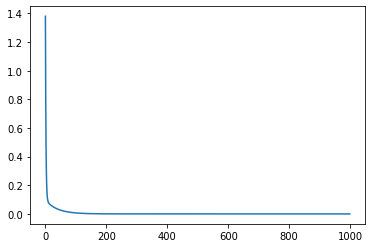

In [203]:
plt.plot(error_list)
plt.show()

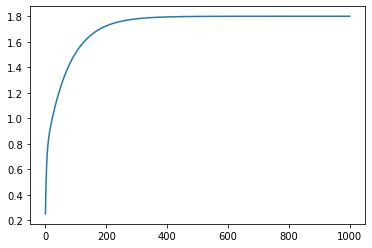

In [204]:
plt.plot(weight_list)
plt.show()

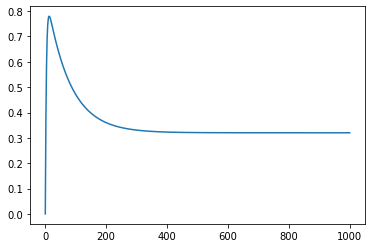

In [205]:
plt.plot(bias_list)
plt.show()